# Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [35]:
right_im2_df = pd.read_csv("spin_images/img_2_zero_order_run2.csv")
left_im2_df = pd.read_csv("spin_images/img_1_zero_order_run2.csv")
right_im2_np = right_im2_df.to_numpy()
left_im2_np = left_im2_df.to_numpy()

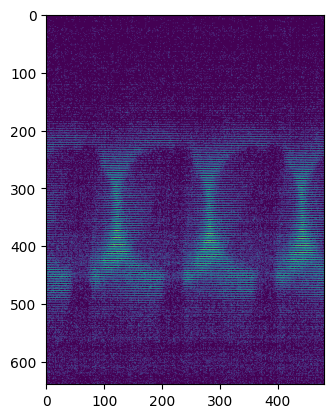

In [36]:
plt.imshow(right_im2_df)
plt.show()

In [37]:
diff_im2_arr = right_im2_np - left_im2_np

In [38]:
diff_im2_arr

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [ 16.,   0.,   0., ...,   0.,   0.,  16.],
       ...,
       [  0.,   0.,   0., ..., -16.,   0.,  16.],
       [  0.,  16.,   0., ..., -16.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

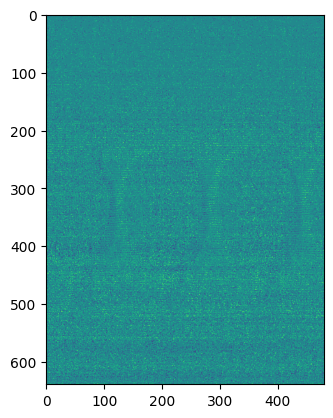

In [39]:
plt.imshow(diff_im2_arr)
plt.show()

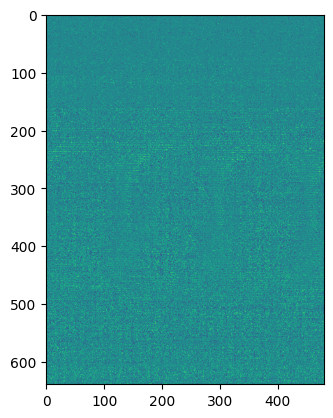

In [34]:
right_im3_df = pd.read_csv("spin_images/img_2_zero_order_run3.csv")
left_im3_df = pd.read_csv("spin_images/img_1_zero_order_run3.csv")
right_im3_np = right_im3_df.to_numpy()
left_im3_np = left_im3_df.to_numpy()
diff_im3_arr = (right_im3_np - left_im3_np)
plt.imshow(diff_im3_arr)
plt.show()

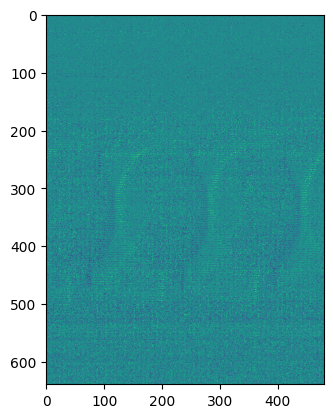

In [42]:
right_im4_df = pd.read_csv("spin_images/img_2_zero_order_run4.csv")
left_im4_df = pd.read_csv("spin_images/img_1_zero_order_run4.csv")
right_im4_np = right_im4_df.to_numpy()
left_im4_np = left_im4_df.to_numpy()
diff_im4_arr = (right_im4_np - left_im4_np)
plt.imshow(diff_im4_arr)
plt.show()

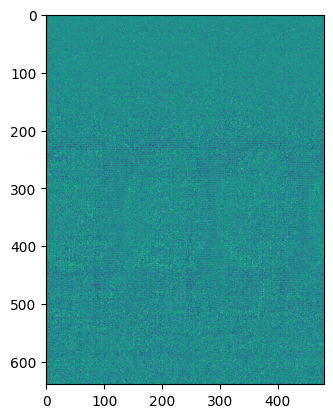

In [85]:
right_im5_df = pd.read_csv("spin_images/img_2_zero_order_run5.csv")
left_im5_df = pd.read_csv("spin_images/img_1_zero_order_run5.csv")
right_im5_np = right_im5_df.to_numpy()
left_im5_np = left_im5_df.to_numpy()
diff_im5_arr = -(right_im5_np - left_im5_np)
plt.imshow(diff_im5_arr)
plt.show()

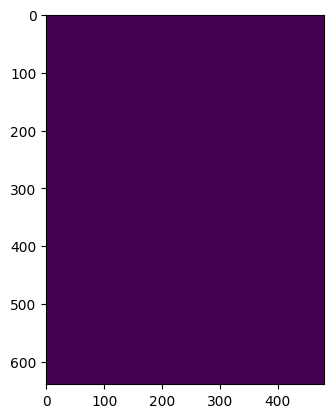

In [60]:
right_im2_spec_df = pd.read_csv("spin_images/img_2_spectra_900_run1.csv")
left_im2_spec_df = pd.read_csv("spin_images/img_2_spectra_900_run1.csv")
right_im2_spec_np = right_im2_spec_df.to_numpy()
left_im2_spec_np = left_im2_spec_df.to_numpy()
diff_im2_spec_arr = (right_im2_spec_np - left_im2_spec_np)
plt.imshow(diff_im2_spec_arr)
plt.show()

In [72]:
#diff_im5_arr.min()
left_im5_np.max()

65.0

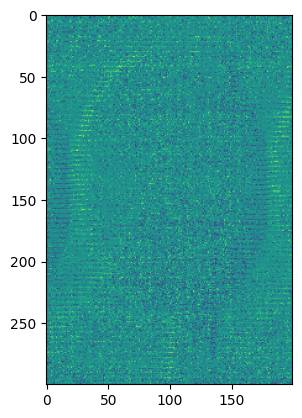

In [76]:
right_im4_df = pd.read_csv("spin_images/img_2_zero_order_run4.csv")
left_im4_df = pd.read_csv("spin_images/img_1_zero_order_run4.csv")
right_im4_np = right_im4_df.to_numpy()[200:500,100:300]
left_im4_np = left_im4_df.to_numpy()[200:500,100:300]
diff_im4_arr = (right_im4_np - left_im4_np)
plt.imshow(diff_im4_arr)
plt.show()

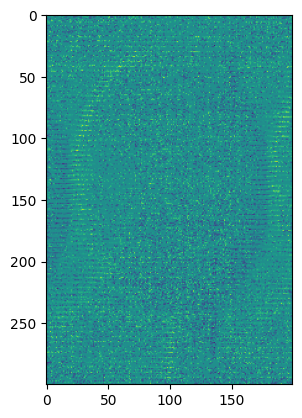

In [77]:
def stretch_contrast(img):
    min_val = np.min(img)
    max_val = np.max(img)
    stretched = (img - min_val) / (max_val - min_val) * 255
    return stretched.astype(np.uint8)

stretchy = stretch_contrast(diff_im4_arr)
plt.imshow(stretchy)
plt.show()

In [88]:
from skimage import exposure

def histogram_equalization(img):
    return exposure.equalize_hist(img) * 255


histo = histogram_equalization(diff_im4_np)
plt.imshow(histo,cmap='gray')
plt.show()

NameError: name 'diff_im4_np' is not defined

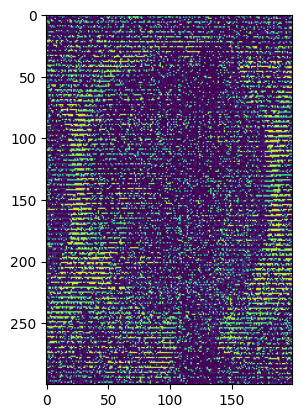

In [84]:
import cv2

def clahe_normalization(img):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    return clahe.apply(img)

clavo = clahe_normalization(np.uint8(255 * diff_im4_arr))
plt.imshow(clavo)
plt.show()

In [83]:
diff_im4_arr.dtype

dtype('float64')

In [2]:
import numpy as np
import cv2

def find_object_center(image):
    """Finds the center of a single object in an image with a black background.

    Args:
        image: Numpy array representing the image.

    Returns:
        Tuple (x, y) representing the object's center coordinates.
    """
    
    # Convert image to grayscale

    imag = (image * 255).round().astype(np.uint8)
    gray = imag#cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Threshold to binary image
    _, thresh = cv2.threshold(gray, 1, 255, cv2.THRESH_BINARY)
    
    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Calculate moments of the largest contour (assumes single object)
    largest_contour = max(contours, key=cv2.contourArea)
    M = cv2.moments(largest_contour)
    
    # Calculate center coordinates
    center_x = int(M["m10"] / M["m00"])
    center_y = int(M["m01"] / M["m00"])
    
    return center_x, center_y

def overlay_images_with_object_alignment(images, method='average'):
    """
    Overlays images aligning the specified object centers.

    Args:
        images: List of numpy arrays representing images.
        object_centers: List of tuples (x, y) with object center coordinates for each image.
        method: Overlay method ('average', 'max', 'min').

    Returns:
        The overlaid image as a numpy array.
    """

    object_centers = [find_object_center(images[:,:,i]) for i in range(1,1000)]  
    #print(len(object_centers))
    # Determine the dimensions of the final image based on the object centers
    max_x = max(x[0] + img.shape[1] // 2 for x, img in zip(object_centers, images))
    max_y = max(x[1] + img.shape[0] // 2 for x, img in zip(object_centers, images))  # Change here
    min_x = min(x[0] - img.shape[1] // 2 for x, img in zip(object_centers, images))  # Change here
    min_y = min(x[1] - img.shape[0] // 2 for x, img in zip(object_centers, images))  # Change here
    result_width = 1500#max_x - min_x
    result_height = 1500#max_y - min_y

    # Create a blank image for overlay
    result = np.zeros((result_height, result_width), dtype=np.float64)

    # Overlay images aligning object centers
    for i in range(1,1000):
        img = images[:,:,i]
        center_x = object_centers[i-1][0]
        center_y = object_centers[i-1][1]
        offset_x = result_width//2 - (center_x-np.shape(img)[0])
        offset_y = result_height//2 - (center_y-np.shape(img)[1])

        x = offset_x  # Use offset directly for x and y
        y = offset_y
        #x = center_x - min_x - img.shape[1] // 2
        #y = center_y - min_y - img.shape[0] // 2
        if method == 'average':
            #print(offset_y)
            #plt.imshow(img)
            #plt.scatter(center[0], center[1], color='red', marker='x')
            #plt.show()
            result[y-(img.shape[0]//2):y+ (img.shape[0]//2), x-(img.shape[1]//2):x+(img.shape[1]//2)] = result[y-(img.shape[0]//2):y+ (img.shape[0]//2), x-(img.shape[1]//2):x+(img.shape[1]//2)].astype(np.float64) + img.astype(np.float64)#/len(images)
            #result = (result/result.max()) * 255
        elif method == 'max':
            result[y:y + img.shape[0], x:x + img.shape[1]] = np.maximum(
                result[y:y + img.shape[0], x:x + img.shape[1]], img)
        elif method == 'min':
            result[y:y + img.shape[0], x:x + img.shape[1]] = np.minimum(
                result[y:y + img.shape[0], x:x + img.shape[1]], img)

    return result#.astype(np.uint8) # Convert back to uint8


In [2]:
images = np.zeros((480,640,1000))
for i in range(1,1000):
    images[:,:,i] = cv2.imread('pol_tests/rightpol/image' + str(i) + '.bmp', cv2.IMREAD_GRAYSCALE)[:,:]

In [17]:
np.shape(images)

(480, 640, 1000)

In [3]:
import matplotlib.pyplot as plt
plt.imshow(images[:,:,1])

NameError: name 'images' is not defined

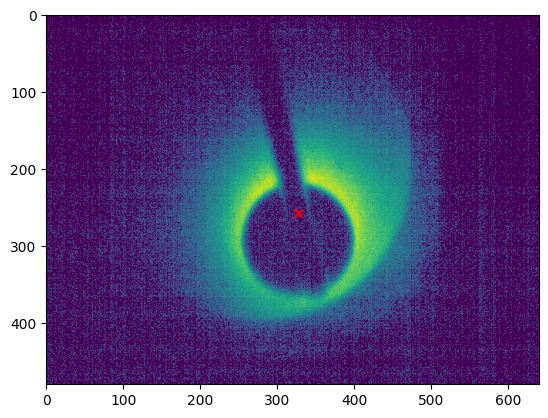

In [19]:
img = images[:,:,520]
center = find_object_center(img)
plt.imshow(img)
plt.scatter(center[0], center[1], color='red', marker='x')
plt.show()

In [4]:
overlaid_image1 = overlay_images_with_object_alignment(images, method='average')

In [6]:
np.shape(overlaid_crop_right)
np.savetxt('rightpoloverlay.csv',overlaid_crop_right,delimiter = ',')

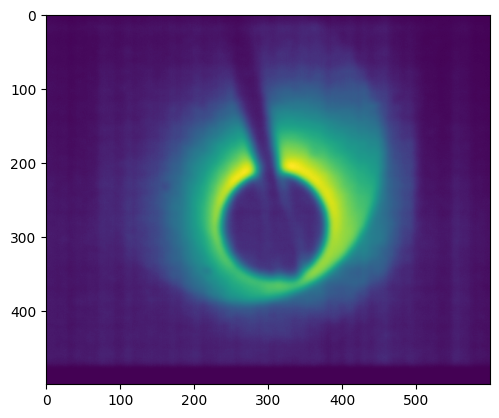

In [5]:
overlaid_crop_right = overlaid_image1[900:1400,600:1200]
plt.imshow(overlaid_crop_right)

In [50]:
(overlaid_image[500,1000] - overlaid_image2[500,1000])/(overlaid_image[500,1000] + overlaid_image2[500,1000])

-0.1898695101759016

In [5]:
overlaidimgright = np.loadtxt('rightpoloverlay.csv',delimiter=',')
overlaidimgleft = np.loadtxt('leftpoloverlay.csv',delimiter=',')

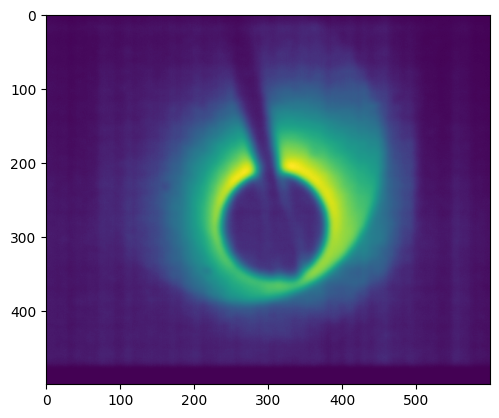

In [7]:
plt.imshow(overlaidimgright)

In [35]:
imgsub = (overlaidimgright-overlaidimgleft)/(overlaidimgright+overlaidimgleft)
imgsub = np.nan_to_num(imgsub, nan=0)
imgsubcrop = imgsub[0:400,150:450]

/tmp/ipykernel_3176/4239953731.py:1: RuntimeWarning: invalid value encountered in divide
  imgsub = (overlaidimgright-overlaidimgleft)/(overlaidimgright+overlaidimgleft)


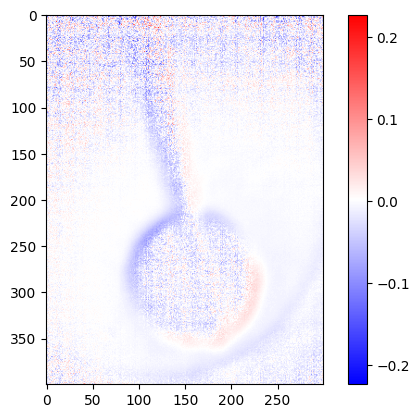

In [41]:
plt.imshow(imgsubcrop,cmap = 'bwr')
plt.colorbar()

In [40]:
imgsubcrop[350,200]

0.01143091623190105